# 1 Single Agent Models

This notebook describes the code used to solve the models from Section 4 of the paper. 

## 1.1 Baseline Model
First consider the environment described in Section 4.4. That is, we first abstract away from model ambiguity and restrict to a single capital stock. Suppose that the logarithm of continuation utility $V$ evolves as:

$$
d {\widehat V}_t = {\hat \mu}_{v,t} dt + \sigma_{v,t} \cdot dB_t
$$

where $ {\hat \mu}_{v,t}$ is the local mean, $ |\sigma_{v,t}|^2$ is local variance and $dB_t$ is a Brownian increment, such that:

$$
0  =   \left({\frac \delta {1 - \rho}} \right) \left[ (C_t/V_t)^{1 - \rho}
  - 1  \right]  + {\hat \mu}_{v,t}  +  \left(\frac{1 - \gamma}{ 2 } \right)  \vert \sigma_{v,t} \vert^2 
$$

We presume that the stochastic component of technology growth $Z_1$ and aggregate stochastic volatility $Z_2$ are governed by the following processes:

$$
d Z_{t}^1 =  - \beta_{1} Z_t^1 dt +  \sqrt{Z_t^2} \sigma_1 \cdot d B_{t} \\
d Z_t^2 = - \beta_2 ( Z_t^2 - \mu_2) dt +  \sqrt{Z_t^2} \sigma_2 \cdot d B_t
$$

Capital growth is governed by:

$$
dK_t = K_t\left[ \Phi \left( \frac{I_t}{K_t} \right) + \beta_k Z_t^1 - \eta_k \right] dt  + K_t \sqrt{Z_t^2}  {\sigma}_k \cdot dB_t
$$

Where:

$$
\Phi(i) = {\frac 1 \phi}  \log \left( 1 + \phi i \right)
$$

Output is constrained by:

$$
C_t + I_t = \alpha K_t
$$

From this we can deduce the Hamilton-Jacobi-Bellman (HJB) equation:

$$
0 =   \max_{c+i = \alpha}  \left\{ \left( \frac{\delta}{1 - \rho} \right) \left( c^{1-\rho} \exp \left[ (\rho - 1) \upsilon \right] - 1 \right) + \Phi(i) + \beta_k z_1 - \eta_k - \frac{1}{2} z_2 |\sigma_k|^2 \right. \\
 \left. + \mu_z \cdot \frac {\partial \upsilon}{\partial z}  +  \frac {z_2}2  {\rm trace} \left\{ {\sigma_z}' \frac {\partial^2 \upsilon}{\partial z \partial z'} \sigma_z \right\} +  \frac{(1 - \gamma) z_2 }{2} \left\vert\sigma_k + {\sigma_z}' \frac {\partial \upsilon}{\partial z}   \right\vert^2 \right\}
$$

Where $c$ is the consumption-to-capital ratio and $i$ is the investment-to-capital ratio. We solve this HJB using the algorithm described in Supplemental Appendix C.1.

<!-- | **Parameter**  | **Value**                                                         |
|----------------|-------------------------------------------------------------------|
| $\eta_k$       | 0.04                                                              |
| $\phi$         | 8                                                                 |
| $\beta_k$      | 0.04                                                              |
| $\beta_1$      | 0.056                                                             |
| $\beta_2$      | 0.194                                                             |
| $\mu_2$        | $6.3 \times 10^{-6}$                                              |
| **Upper triangular**  
| $\sigma_2$ |$\sqrt{12} \times [0.92, 0.40, 0]$                              |
| **Lower triangular** | $\sqrt{12} \times [1, 0, 0]$                                    |
| $\sigma_k$     | $\sqrt{12} \times [0.92, 0.40, 0]$                                |
| $\sigma_1$     | $\sqrt{12} \times [0, 5.7, 0]$                                    |
| **Lower triangular** | $\sqrt{12} \times [2.3, 5.2, 0]$                                |
| $\sigma_2$     | $\sqrt{12} \times [0, 0, 0.00031]$                                | -->

## 1.2 Solution Overview

The function `main_one_capital` solves the above HJB equation. It uses functions from `utils_onecapital`, which first-time users should not change. `main_onecapital` takes in the following inputs:

```{list-table}
:header-rows: 1

* - Input
  - Notation in paper
  - Description
* - `Delta`
  - $\Delta_t$
  - False-transient step-size: lower values (0.01 or 0.001) reduce likelihood of convergence issues
* - `gamma`
  - $\gamma$
  - Uncertainty aversion
* - `delta`
  - $\delta$
  - Discount rate
* - `rho`
  - $\rho$
  - Inverse of IES
* - `alpha`
  - $\alpha$
  - Productivity
```

The user can also edit the `main_onecapital` Julia file to change model parameters which are held fixed in the paper, including:

```{list-table}
:header-rows: 1

* - Input
  - Notation in paper
  - Description
* - `cons`
  - $c$
  - Consumption-output ratio
* - `a11`
  - $\beta_1$
  - Persistence of $Z_1$
* - `a22`
  - $\beta_2$
  - Persistence of $Z_2$
* - `ymean`
  - $\mu_2$
  - Mean of $Z_2$
* - `phi`
  - $\phi$
  - Adjustment cost
* - `sigma_k`
  - $\sigma_k$
  - Shock exposure for $dK$
* - `sigma_z`
  - $\sigma_1$
  - Shock exposure for $dZ_1$
* - `sigma_y`
  - $\sigma_2$
  - Shock exposure for $dZ_2$
```

Finally, the following parameters govern the construction of the state space grid and convergence criteria:
```{list-table}
:header-rows: 1

* - Input
  - Description
* - `zmin`,`zmax`
  - Minimum and maximum values of $Z_1$ grid; an insufficiently large grid may cause inaccuracies
* - `II`
  - Number of $Z_1$ gridpoints
* - `ymin`,`ymax`
  - Minimum and maximum values of $Z_2$ grid; an insufficiently large grid may cause inaccuracies
* - `JJ`
  - Number of $Z_2$ gridpoints
* - `maxit`
  - Maximum number of value function iterations 
* - `crit`
  - The algorithm stops when the difference between $V_t$ and $V_{t+1}$ is less than `crit` for all points on the state-space grid
```

`main_onecapital` outputs a dictionary that contains the above parameters, as well as the following outputs:
```{list-table}
:header-rows: 1

* - Output
  - Notation in paper
  - Description
* - V
  - $V$
  - Value function
* - `c`
  - $\frac{C}{K}$
  - Consumption-capital ratio
* - `d`
  - $\frac{I}{K}$
  - Investment-capital ratio
* - Vz
  - $\frac{\partial{v}}{\partial{z_1}}$
  - Derivative of $V$ with respect to $Z^1$
* - Vy
  - $\frac{\partial{v}}{\partial{z_2}}$
  - Derivative of $V$ with respect to $Z^2$
* - mu_k
  - $\mu_{\hat{K}}$
  - Drift of $\log{K}$
* - g
  - 
  - Stationary density
* - [`hk`,`hz`,`hy`]
  - $\sigma_k + \sigma_z' \frac{\partial{v}}{\partial{z}}$
  - Robust control term
* - `ymean`
  - $\mu_2$
  - Mean of $Z_2$
* - `phi`
  - $\phi$
  - Adjustment cost
* - `sigma_k`
  - $\sigma_k$
  - Shock exposure for $dK$
* - `sigma_z`
  - $\sigma_1$
  - Shock exposure for $dZ_1$
* - `sigma_y`
  - $\sigma_2$
  - Shock exposure for $dZ_2$

## 1.3 Quick Start
We begin by importing required libraries:

In [1]:
using LinearAlgebra
using SparseArrays
using Interpolations
using SuiteSparse
using Plots
include("src/1/utils_onecapital.jl")
include("src/1/main_onecapital.jl")

  Activating project at `/project/lhansen/macrofinance`


Next we set parameters, including an `action_name` which determines where the file is saved:

In [2]:
alpha = 0.0922
delta = 0.01
gamma = 1.0
Delta = 1.0
rho = 1.0
action_name = "test"

"test"

Now we can run our main function:

In [3]:
results = main(gamma, rho, Delta, delta, alpha, action_name)

zmax = 5.0, zmin = -5.0, zlength = 201
ymax = 2.0e-5, ymin = 5.0e-7, ylength = 201


----------------------------------
Iteration = 1
Distance = 0.2253588241838127
v max = -5.774641175816187
v min = 

-6.149840658685116
----------------------------------


----------------------------------
Iteration = 2
Distance = 0.21336164298098925
v max = -5.561279532835198
v min = -6.28844158588914
----------------------------------


----------------------------------
Iteration = 3
Distance = 0.2020913901009722
v max = -5.359188142734226
v min = -6.416520157178582
----------------------------------


----------------------------------
Iteration = 4
Distance = 0.19150073759421993
v max = -5.167687405140006
v min = -6.534747094790304
----------------------------------


----------------------------------
Iteration = 5
Distance = 0.1815472483518974
v max = -4.9861401567881085
v min = -6.643751090716898
----------------------------------


----------------------------------
Iteration = 6
Distance = 0.17219150143816453
v max = -4.813948655349944
v min = -6.744121723370125
----------------------------------


----------------------------------
Iteration = 7
Distance = 0.1633965997756075
v max = -4.6505520555743365
v min = -6.836411926841702
----------------------------------


----------------------------------
Iteration = 8
Distance = 0.15512795340565422
v max = -4.495424102168682
v min = -6.921140261314288
----------------------------------


----------------------------------
Iteration = 9
Distance = 0.14735312333239836
v max = -4.348070978836284
v min = -6.998793036482345
----------------------------------


----------------------------------
Iteration = 10
Distance = 0.1400416845395922
v max = -4.208029294296692
v min = -7.069826303616259
----------------------------------


----------------------------------
Iteration = 11
Distance = 0.13316509964973378
v max = -4.074864194646958
v min = -7.134667725232818
----------------------------------


----------------------------------
Iteration = 12
Distance = 0.12669660102532898
v max = -3.948167593621629
v min = -7.193718329897394
----------------------------------


----------------------------------
Iteration = 13
Distance = 0.12061108042061086
v max = -3.827556513201018
v min = -7.247354159129413
----------------------------------


----------------------------------
Iteration = 14
Distance = 0.11488498560899219
v max = -3.712671527592026
v min = -7.295927812969371
----------------------------------


----------------------------------
Iteration = 15
Distance = 0.10949622351522592
v max = -3.6031753040768
v min = -7.339769900381859
----------------------------------


----------------------------------
Iteration = 16
Distance = 0.10442406943040172
v max = -3.4987512346463983
v min = -7.379190400302026
----------------------------------


----------------------------------
Iteration = 17
Distance = 0.09964908192078292
v max = -3.3991021527256153
v min = -7.4144799387851545
----------------------------------


----------------------------------
Iteration = 18
Distance = 0.09515302306783768
v max = -3.3039491296577777
v min = -7.44591098739077
----------------------------------


----------------------------------
Iteration = 19
Distance = 0.09091878370068551
v max = -3.213030345957092
v min = -7.473738987623915
----------------------------------


----------------------------------
Iteration = 20
Distance = 0.08693031330387813
v max = -3.126100032653214
v min = -7.498203405965285
----------------------------------


----------------------------------
Iteration = 21
Distance = 0.08317255430379822
v max = -3.042927478349416
v min = -7.519528723748951
----------------------------------


----------------------------------
Iteration = 22
Distance = 0.0796313804564881
v max = -2.9632960978929277
v min = -7.53792536588859
----------------------------------


----------------------------------
Iteration = 23
Distance = 0.07629353907716885
v max = -2.887002558815759
v min = -7.5535905722111645
----------------------------------


----------------------------------
Iteration = 24
Distance = 0.07314659686922065
v max = -2.813855961946538
v min = -7.566709214928967
----------------------------------


----------------------------------
Iteration = 25
Distance = 0.07017888912550507
v max = -2.743677072821033
v min = -7.577454565566124
----------------------------------


----------------------------------
Iteration = 26
Distance = 0.06737947209015971
v max = -2.6762976007308734
v min = -7.585989014454071
----------------------------------


----------------------------------
Iteration = 27
Distance = 0.06473807828212008
v max = -2.6115595224487533
v min = -7.592464745719907
----------------------------------


----------------------------------
Iteration = 28
Distance = 0.06224507459499318
v max = -2.54931444785376
v min = -7.597024370513247
----------------------------------


----------------------------------
Iteration = 29
Distance = 0.059891422999243105
v max = -2.489423024854517
v min = -7.599801521049017
----------------------------------


----------------------------------
Iteration = 30
Distance = 0.05766864368421043
v max = -2.4317543811703066
v min = -7.600921407885455
----------------------------------


----------------------------------
Iteration = 31
Distance = 0.05556878048748404
v max = -2.3761856006828226
v min = -7.600501342708155
----------------------------------


----------------------------------
Iteration = 32
Distance = 0.05358436846908354
v max = -2.322601232213739
v min = -7.598651228751441
----------------------------------


----------------------------------
Iteration = 33
Distance = 0.05170840349672812
v max = -2.270892828717011
v min = -7.595474020857287
----------------------------------


----------------------------------
Iteration = 34
Distance = 0.04993431371706736
v max = -2.2209585149999436
v min = -7.591066157048856
----------------------------------


----------------------------------
Iteration = 35
Distance = 0.048255932795452594
v max = -2.172702582204491
v min = -7.5855179633796945
----------------------------------


----------------------------------
Iteration = 36
Distance = 0.04666747481441469
v max = -2.1260351073900763
v min = -7.578914033711891
----------------------------------


----------------------------------
Iteration = 37
Distance = 0.04516351072766778
v max = -2.0808715966624085
v min = -7.571333585973548
----------------------------------


----------------------------------
Iteration = 38
Distance = 0.043738946273102375
v max = -2.037132650389306
v min = -7.562850796350842
----------------------------------


----------------------------------
Iteration = 39
Distance = 0.042389001254186987
v max = -1.9947436491351191
v min = -7.553535112779956
----------------------------------


----------------------------------
Iteration = 40
Distance = 0.041109190104831494
v max = -1.9536344590302877
v min = -7.543451549019663
----------------------------------


----------------------------------
Iteration = 41
Distance = 0.03989530365810845
v max = -1.9137391553721792
v min = -7.53266096050653
----------------------------------


----------------------------------
Iteration = 42
Distance = 0.038743392044169545
v max = -1.8749957633280097
v min = -7.521220303119955
----------------------------------


----------------------------------
Iteration = 43
Distance = 0.03764974864731441
v max = -1.8373460146806952
v min = -7.5091828759150285
----------------------------------


----------------------------------
Iteration = 44
Distance = 0.036610895056615744
v max = -1.8007351196240795
v min = -7.496598548815609
----------------------------------


----------------------------------
Iteration = 45
Distance = 0.03562356694842772
v max = -1.7651115526756518
v min = -7.483513976198523
----------------------------------


----------------------------------
Iteration = 46
Distance = 0.03468470084309461
v max = -1.7304268518325572
v min = -7.469972797242244
----------------------------------


----------------------------------
Iteration = 47
Distance = 0.033791421681681255
v max = -1.696635430150876
v min = -7.456015823859638
----------------------------------


----------------------------------
Iteration = 48
Distance = 0.03294103117188052
v max = -1.6636943989789954
v min = -7.441681216983331
----------------------------------


----------------------------------
Iteration = 49
Distance = 0.03213099685550613
v max = -1.6315634021234893
v min = -7.4270046519247765
----------------------------------


----------------------------------
Iteration = 50
Distance = 0.03135894185280175
v max = -1.6002044602706875
v min = -7.412019473483759
----------------------------------


----------------------------------
Iteration = 51
Distance = 0.030622635241715823
v max = -1.5695818250289717
v min = -7.3967568414425955
----------------------------------


----------------------------------
Iteration = 52
Distance = 0.029919983032741015
v max = -1.5396618419962307
v min = -7.381245867040775
----------------------------------


----------------------------------
Iteration = 53
Distance = 0.029249019702527246
v max = -1.5104128222937034
v min = -7.365513740988268
----------------------------------


----------------------------------
Iteration = 54
Distance = 0.02860790025154758
v max = -1.4818049220421559
v min = -7.349585853541605
----------------------------------


----------------------------------
Iteration = 55
Distance = 0.0279948927534579
v max = -1.453810029288698
v min = -7.333485907134195
----------------------------------


----------------------------------
Iteration = 56
Distance = 0.027408371365667206
v max = -1.4264016579230308
v min = -7.317236022021857
----------------------------------


----------------------------------
Iteration = 57
Distance = 0.026846809772549163
v max = -1.3995548481504816
v min = -7.300856835376259
----------------------------------


----------------------------------
Iteration = 58
Distance = 0.02630877503451834
v max = -1.3732460731159633
v min = -7.284367594231941
----------------------------------


----------------------------------
Iteration = 59
Distance = 0.025792921817834547
v max = -1.3474531512981287
v min = -7.267786242667573
----------------------------------


----------------------------------
Iteration = 60
Distance = 0.02529798698158081
v max = -1.322155164316548
v min = -7.251129503578547
----------------------------------


----------------------------------
Iteration = 61
Distance = 0.024822784499650252
v max = -1.2973323798168976
v min = -7.234412955375855
----------------------------------


----------------------------------
Iteration = 62
Distance = 0.024366200697069074
v max = -1.2729661791198286
v min = -7.217651103925473
----------------------------------


----------------------------------
Iteration = 63
Distance = 0.02392718978111419
v max = -1.2490389893387144
v min = -7.2008574500230385
----------------------------------


----------------------------------
Iteration = 64
Distance = 0.023504769649075996
v max = -1.2255342196896384
v min = -7.184044552680418
----------------------------------


----------------------------------
Iteration = 65
Distance = 0.02309801795540123
v max = -1.2024362017342372
v min = -7.167224088483433
----------------------------------


----------------------------------
Iteration = 66
Distance = 0.02270606842229106
v max = -1.179730133311946
v min = -7.150406907264158
----------------------------------


----------------------------------
Iteration = 67
Distance = 0.022328107378614792
v max = -1.1574020259333313
v min = -7.133603084316123
----------------------------------


----------------------------------
Iteration = 68
Distance = 0.02196337051298136
v max = -1.13543865542035
v min = -7.11682196936655
----------------------------------


----------------------------------
Iteration = 69
Distance = 0.021611139827782733
v max = -1.1138275155925672
v min = -7.100072232506306
----------------------------------


----------------------------------
Iteration = 70
Distance = 0.021270740781687225
v max = -1.09255677481088
v min = -7.083361907266405
----------------------------------


----------------------------------
Iteration = 71
Distance = 0.02094153960900469
v max = -1.0716152352018753
v min = -7.066698431017431
----------------------------------


----------------------------------
Iteration = 72
Distance = 0.020622940804844392
v max = -1.050992294397031
v min = -7.05008868285802
----------------------------------


----------------------------------
Iteration = 73
Distance = 0.020314384765976135
v max = -1.0306779096310548
v min = -7.033539019147796
----------------------------------


----------------------------------
Iteration = 74
Distance = 0.020015345577565347
v max = -1.0106625640534894
v min = -7.017055306830777
----------------------------------


----------------------------------
Iteration = 75
Distance = 0.01972532893693102
v max = -0.9909372351165584
v min = -7.000642954686102
----------------------------------


----------------------------------
Iteration = 76
Distance = 0.01944387020568139
v max = -0.971493364910877
v min = -6.984306942634507
----------------------------------


----------------------------------
Iteration = 77
Distance = 0.019170532582414745
v max = -0.9523228323284623
v min = -6.96805184922102
----------------------------------


----------------------------------
Iteration = 78
Distance = 0.018904905388429705
v max = -0.9334179269400326
v min = -6.9518818773869455
----------------------------------


----------------------------------
Iteration = 79
Distance = 0.018646602459504003
v max = -0.9147713244805286
v min = -6.935800878636964
----------------------------------


----------------------------------
Iteration = 80
Distance = 0.01839526063711794
v max = -0.8963760638434106
v min = -6.919812375701071
----------------------------------


----------------------------------
Iteration = 81
Distance = 0.018150538353060797
v max = -0.8782255254903498
v min = -6.903919583784454
----------------------------------


----------------------------------
Iteration = 82
Distance = 0.017912114301523063
v max = -0.8603134111888268
v min = -6.88812543049272
----------------------------------


----------------------------------
Iteration = 83
Distance = 0.01767968619335092
v max = -0.8426337249954758
v min = -6.8724325745149315
----------------------------------


----------------------------------
Iteration = 84
Distance = 0.017452969587335554
v max = -0.8251807554081403
v min = -6.856843423141071
----------------------------------


----------------------------------
Iteration = 85
Distance = 0.0172316967937729
v max = -0.8079490586143674
v min = -6.841360148686399
----------------------------------


----------------------------------
Iteration = 86
Distance = 0.017015615845813237
v max = -0.7909334427685542
v min = -6.825984703890388
----------------------------------


----------------------------------
Iteration = 87
Distance = 0.016804489534440137
v max = -0.774128953234114
v min = -6.810718836353903
----------------------------------


----------------------------------
Iteration = 88
Distance = 0.01659809450308869
v max = -0.7575308587310253
v min = -6.795564102074019
----------------------------------


----------------------------------
Iteration = 89
Distance = 0.01639622039825306
v max = -0.7411346383327723
v min = -6.780521878132813
----------------------------------


----------------------------------
Iteration = 90
Distance = 0.016198669072584826
v max = -0.7249359692601874
v min = -6.765593374592156
----------------------------------


----------------------------------
Iteration = 91
Distance = 0.016005253837276356
v max = -0.7089307154229111
v min = -6.750779645644121
----------------------------------


----------------------------------
Iteration = 92
Distance = 0.01581579876061634
v max = -0.6931149166622947
v min = -6.736081600062917
----------------------------------


----------------------------------
Iteration = 93
Distance = 0.01563013800992663
v max = -0.6774847786523681
v min = -6.721500011001778
----------------------------------


----------------------------------
Iteration = 94
Distance = 0.01544811523414713
v max = -0.662036663418221
v min = -6.707035525175505
----------------------------------


----------------------------------
Iteration = 95
Distance = 0.015269582984566377
v max = -0.6467670804336546
v min = -6.692688671466613
----------------------------------


----------------------------------
Iteration = 96
Distance = 0.015094402171357713
v max = -0.6316726782622969
v min = -6.678459868990997
----------------------------------


----------------------------------
Iteration = 97
Distance = 0.014922441553671506
v max = -0.6167502367086254
v min = -6.6643494346566134
----------------------------------


----------------------------------
Iteration = 98
Distance = 0.014753577261219508
v max = -0.6019966594474059
v min = -6.65035759024651
----------------------------------


----------------------------------
Iteration = 99
Distance = 0.014587692345422343
v max = -0.5874089671019835
v min = -6.6364844690559694
----------------------------------


----------------------------------
Iteration = 100
Distance = 0.014424676358253175
v max = -0.5729842907437304
v min = -6.62273012211131
----------------------------------


----------------------------------
Iteration = 101
Distance = 0.01426442495710134
v max = -0.558719865786629
v min = -6.60909452399623
----------------------------------


----------------------------------
Iteration = 102
Distance = 0.01410683953401115
v max = -0.5446130262526179
v min = -6.5955775783102695
----------------------------------


----------------------------------
Iteration = 103
Distance = 0.013951826867819817
v max = -0.530661199384798
v min = -6.582179122782088
----------------------------------


----------------------------------
Iteration = 104
Distance = 0.01379929879774977
v max = -0.5168619005870483
v min = -6.56889893405903
----------------------------------


----------------------------------
Iteration = 105
Distance = 0.013649171917140768
v max = -0.5032127286699075
v min = -6.555736732193195
----------------------------------


----------------------------------
Iteration = 106
Distance = 0.013501367286081922
v max = -0.4897113613838256
v min = -6.542692184842672
----------------------------------


----------------------------------
Iteration = 107
Distance = 0.013355810161766402
v max = -0.4763555512220592
v min = -6.529764911205817
----------------------------------


----------------------------------
Iteration = 108
Distance = 0.013212429745457
v max = -0.4631431214766022
v min = -6.516954485705131
----------------------------------


----------------------------------
Iteration = 109
Distance = 0.013071158945074157
v max = -0.45007196253152804
v min = -6.504260441436194
----------------------------------


----------------------------------
Iteration = 110
Distance = 0.012931934152393909
v max = -0.4371400283791341
v min = -6.491682273396496
----------------------------------


----------------------------------
Iteration = 111
Distance = 0.012794695033988834
v max = -0.4243453333451453
v min = -6.479219441507639
----------------------------------


----------------------------------
Iteration = 112
Distance = 0.012659384335043267
v max = -0.411685949010102
v min = -6.466871373443819
----------------------------------


----------------------------------
Iteration = 113
Distance = 0.012525947695243789
v max = -0.39916000131485824
v min = -6.454637467278804
----------------------------------


----------------------------------
Iteration = 114
Distance = 0.012394333476012043
v max = -0.3867656678388462
v min = -6.442517093962476
----------------------------------


----------------------------------
Iteration = 115
Distance = 0.01226449259836676
v max = -0.37450117524047943
v min = -6.4305095996377295
----------------------------------


----------------------------------
Iteration = 116
Distance = 0.01213637839076065
v max = -0.3623647968497188
v min = -6.4186143078075935
----------------------------------


----------------------------------
Iteration = 117
Distance = 0.012009946446281838
v max = -0.35035485040343695
v min = -6.4068305213619015
----------------------------------


----------------------------------
Iteration = 118
Distance = 0.01188515448862243
v max = -0.3384696959148145
v min = -6.395157524472323
----------------------------------


----------------------------------
Iteration = 119
Distance = 0.011761962246296553
v max = -0.32670773366851796
v min = -6.383594584363977
----------------------------------


----------------------------------
Iteration = 120
Distance = 0.011640331334580312
v max = -0.31506740233393765
v min = -6.372140952971205
----------------------------------


----------------------------------
Iteration = 121
Distance = 0.01152022514469997
v max = -0.3035471771892377
v min = -6.360795868484845
----------------------------------


----------------------------------
Iteration = 122
Distance = 0.011401608739821933
v max = -0.29214556844941575
v min = -6.349558556797881
----------------------------------


----------------------------------
Iteration = 123
Distance = 0.011284448757426235
v max = -0.2808611196919895
v min = -6.338428232855514
----------------------------------


----------------------------------
Iteration = 124
Distance = 0.01116871331766206
v max = -0.26969240637432745
v min = -6.327404101915955
----------------------------------


----------------------------------
Iteration = 125
Distance = 0.011054371937325558
v max = -0.2586380344370019
v min = -6.316485360727328
----------------------------------


----------------------------------
Iteration = 126
Distance = 0.010941395449097141
v max = -0.24769663898790475
v min = -6.305671198625969
----------------------------------


----------------------------------
Iteration = 127
Distance = 0.010829755925734652
v max = -0.2368668830621701
v min = -6.2949607985611475
----------------------------------


----------------------------------
Iteration = 128
Distance = 0.01071942660889047
v max = -0.22614745645327963
v min = -6.284353338050678
----------------------------------


----------------------------------
Iteration = 129
Distance = 0.010610381842291267
v max = -0.21553707461098837
v min = -6.273847990071817
----------------------------------


----------------------------------
Iteration = 130
Distance = 0.010502597008996611
v max = -0.20503447760199175
v min = -6.263443923891542
----------------------------------


----------------------------------
Iteration = 131
Distance = 0.010396048472485181
v max = -0.19463842912950657
v min = -6.253140305840012
----------------------------------


----------------------------------
Iteration = 132
Distance = 0.010290713521336453
v max = -0.18434771560817012
v min = -6.242936300030643
----------------------------------


----------------------------------
Iteration = 133
Distance = 0.010186570317287008
v max = -0.1741611452908831
v min = -6.232831069030405
----------------------------------


----------------------------------
Iteration = 134
Distance = 0.010083597846441944
v max = -0.16407754744444117
v min = -6.222823774483261
----------------------------------


----------------------------------
Iteration = 135
Distance = 0.009981775873467352
v max = -0.15409577157097382
v min = -6.212913577689792
----------------------------------


----------------------------------
Iteration = 136
Distance = 0.009881084898553244
v max = -0.14421468667242057
v min = -6.20309964014584
----------------------------------


----------------------------------
Iteration = 137
Distance = 0.009781506117000044
v max = -0.13443318055542053
v min = -6.193381124042535
----------------------------------


----------------------------------
Iteration = 138
Distance = 0.009683021381251516
v max = -0.12475015917416901
v min = -6.183757192730421
----------------------------------


----------------------------------
Iteration = 139
Distance = 0.009585613165231696
v max = -0.11516454600893732
v min = -6.174227011149746
----------------------------------


----------------------------------
Iteration = 140
Distance = 0.009489264530835442
v max = -0.10567528147810187
v min = -6.164789746229195
----------------------------------


----------------------------------
Iteration = 141
Distance = 0.009393959096448898
v max = -0.09628132238165298
v min = -6.1554445672549525
----------------------------------


----------------------------------
Iteration = 142
Distance = 0.009299681007367847
v max = -0.08698164137428513
v min = -6.146190646212138
----------------------------------


----------------------------------
Iteration = 143
Distance = 0.009206414907999408
v max = -0.07777522646628572
v min = -6.137027158100155
----------------------------------


----------------------------------
Iteration = 144
Distance = 0.009114145915738447
v max = -0.06866108055054727
v min = -6.127953281223828
----------------------------------


----------------------------------
Iteration = 145
Distance = 0.009022859596413246
v max = -0.05963822095413403
v min = -6.118968197461763
----------------------------------


----------------------------------
Iteration = 146
Distance = 0.008932541941202417
v max = -0.05070567901293161
v min = -6.110071092513383
----------------------------------


----------------------------------
Iteration = 147
Distance = 0.008843179344940152
v max = -0.04186249966799146
v min = -6.101261156126053
----------------------------------


----------------------------------
Iteration = 148
Distance = 0.008754758585712542
v max = -0.033107741082278916
v min = -6.092537582303588
----------------------------------


----------------------------------
Iteration = 149
Distance = 0.008667266805675946
v max = -0.02444047427660297
v min = -6.083899569497201
----------------------------------


----------------------------------
Iteration = 150
Distance = 0.008580691493015935
v max = -0.015859782783587035
v min = -6.075346320780258
----------------------------------


----------------------------------
Iteration = 151
Distance = 0.008495020464979757
v max = -0.007364762318607278
v min = -6.066877044007655
----------------------------------


----------------------------------
Iteration = 152
Distance = 0.00841024185191394
v max = 0.0010454795333066608
v min = -6.058490951960966
----------------------------------


----------------------------------
Iteration = 153
Distance = 0.008326344082248482
v max = 0.009371823615555143
v min = -6.050187262480246
----------------------------------


----------------------------------
Iteration = 154
Distance = 0.00824331586836554
v max = 0.017615139483920683
v min = -6.0419651985833
----------------------------------


----------------------------------
Iteration = 155
Distance = 0.008161146193300137
v max = 0.02577628567722082
v min = -6.033823988573313
----------------------------------


----------------------------------
Iteration = 156
Distance = 0.008079824298223338
v max = 0.03385610997544416
v min = -6.0257628661356
----------------------------------


----------------------------------
Iteration = 157
Distance = 0.00799933967065871
v max = 0.04185544964610287
v min = -6.017781070424158
----------------------------------


----------------------------------
Iteration = 158
Distance = 0.007919682033385105
v max = 0.04977513167948797
v min = -6.009877846138623
----------------------------------


----------------------------------
Iteration = 159
Distance = 0.007840841333985216
v max = 0.05761597301347319
v min = -6.002052443592506
----------------------------------


----------------------------------
Iteration = 160
Distance = 0.0077628077350029925
v max = 0.06537878074847618
v min = -5.994304118772934
----------------------------------


----------------------------------
Iteration = 161
Distance = 0.007685571604667069
v max = 0.07306435235314325
v min = -5.986632133392875
----------------------------------


----------------------------------
Iteration = 162
Distance = 0.007609123508151128
v max = 0.08067347586129438
v min = -5.979035754935954
----------------------------------


----------------------------------
Iteration = 163
Distance = 0.007533454199333808
v max = 0.08820693006062819
v min = -5.971514256694618
----------------------------------


----------------------------------
Iteration = 164
Distance = 0.007458554613030632
v max = 0.09566548467365882
v min = -5.964066917802052
----------------------------------


----------------------------------
Iteration = 165
Distance = 0.007384415857668705
v max = 0.10304990053132752
v min = -5.956693023258141
----------------------------------


----------------------------------
Iteration = 166
Distance = 0.0073110292083753
v max = 0.11036092973970282
v min = -5.949391863950095
----------------------------------


----------------------------------
Iteration = 167
Distance = 0.0072383861004576555
v max = 0.11759931584016048
v min = -5.942162736667951
----------------------------------


----------------------------------
Iteration = 168
Distance = 0.007166478123246764
v max = 0.12476579396340724
v min = -5.935004944115355
----------------------------------


----------------------------------
Iteration = 169
Distance = 0.007095297014287502
v max = 0.13186109097769474
v min = -5.927917794915952
----------------------------------


LoadError: InterruptException:

By default, the solution is saved to the `output` folder. As an illustration, we can plot how the value function varies with $Z^1$ while $Z^2$ is fixed at its median. We can do this by loading in `results["V"]`, which contains our value function, and `results["zz"]`, which contains the values of $Z^1$ of our state-space grid. We fix $Z^2$ by setting the first index of both these arrays to the desired value. These results can be used to compute elasticities, which are described in the following section.

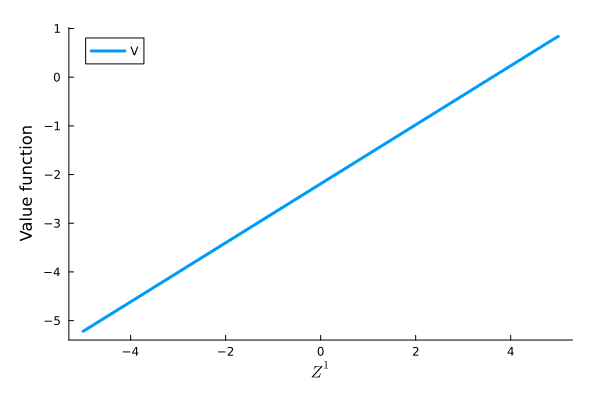

In [76]:
plot(results["zz"][:,60], results["V"][:,60], label="V", xlabel="\$Z^1\$", ylabel="Value function", margin=5Plots.mm,linewidth=3,grid=false)


# 1.4 Model Ambiguity